**COVID -19 DISEASES PREDICTIONS**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode (connected=True)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading of Datasets:

df=pd.read_csv('Covid-19_dataset.csv')
df.head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,765,15.0,02-10-20,new confirmed COVID-19 patient in Vietnam: 3 m...,Vinh Phuc,Vietnam,NaN,0.25,NaN,NaN,NaN,NaN,NaN,0,0,0,1,NaN,Vietnam News,https://vietnamnews.vn/society/591803/viet-nam...
1,477,27.0,02-05-20,new confirmed COVID-19 patient in Singapore: m...,Singapore,Singapore,male,0.50,NaN,NaN,NaN,1/23/2020,02-03-20,0,0,0,1,NaN,Straits Times,https://www.straitstimes.com/singapore/health/...


In [3]:
df.shape

(1085, 20)

In [4]:
df.dtypes

id                         int64
case_in_country          float64
reporting date            object
summary                   object
location                  object
country                   object
gender                    object
age                      float64
symptom_onset             object
If_onset_approximated    float64
hosp_visit_date           object
exposure_start            object
exposure_end              object
visiting Wuhan             int64
from Wuhan                 int64
death                      int64
recovered                  int64
symptom                   object
source                    object
link                      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   summary                1080 non-null   object 
 4   location               1085 non-null   object 
 5   country                1085 non-null   object 
 6   gender                 902 non-null    object 
 7   age                    843 non-null    float64
 8   symptom_onset          563 non-null    object 
 9   If_onset_approximated  560 non-null    float64
 10  hosp_visit_date        507 non-null    object 
 11  exposure_start         128 non-null    object 
 12  exposure_end           341 non-null    object 
 13  visiting Wuhan         1085 non-null   int64  
 14  from Wuhan             1085 non-null   int64  
 15  deat

**Data Cleaning**

In [6]:
#Data Cleaning

df.drop(['id','case_in_country','summary','symptom_onset', 'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
'exposure_end', 'symptom', 'source', 'link'],axis=1,inplace=True)

In [7]:
100*df.isnull().sum()/df.shape[0]

reporting date     0.092166
location           0.000000
country            0.000000
gender            16.866359
age               22.304147
visiting Wuhan     0.000000
from Wuhan         0.000000
death              0.000000
recovered          0.000000
dtype: float64

In [8]:
# Now age and gender has some null values:
#Replace null values in gender as Male
#Cloumns which contains less than 0.5% of null values are remained, we drop the rows of that Data frame

In [9]:
#Covert Categorical into numerical form


df['age']=df['age'].fillna(df['age'].mean())
df_dum=pd.get_dummies(df['gender'].dropna(),drop_first=True)

In [10]:
df_dum['male'].median()

1.0

In [11]:
df['gender']=df['gender'].fillna('male')

In [12]:
#Fianlly the columns that contain less than 0.5% null values are remained, 
#we drop the rows of df that contain these null values.

In [13]:
df.dropna(inplace=True)    #this line helps to make reporting date as 0' value
df.isnull().sum()

reporting date    0
location          0
country           0
gender            0
age               0
visiting Wuhan    0
from Wuhan        0
death             0
recovered         0
dtype: int64

In [14]:
# Now all values are correct no null values.

**Feature Engineering**

In [15]:
# Featuring Engineering

#We remane some columns:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [16]:
#Now we change the format of Date and Month

df['reporting_date']=pd.to_datetime(df['reporting_date'])

df['year']=df['reporting_date'].apply(lambda x:x.year)
df['month']=df['reporting_date'].apply(lambda x:x.month)
df['month'].unique()      # This will convert Data frame into Array of binary

array([2, 1], dtype=int64)

In [17]:
# as there is only One year mention in entire dataset we drop year

#df.drop(['reporting_date', 'year'], axis=1, inplace=True)
df.head()

,reporting_date,location,country,gender,age,visiting_wuhan,from_wuhan,death,recovered,year,month
0,2020-02-10,Vinh Phuc,Vietnam,male,0.25,0,0,0,1,2020,2
1,2020-02-05,Singapore,Singapore,male,0.50,0,0,0,1,2020,2
2,2020-02-17,Singapore,Singapore,male,1.00,0,0,0,1,2020,2
3,2020-01-25,"Hechi, Guangxi",China,female,2.00,1,0,0,0,2020,1
4,2020-01-25,Johor,Malaysia,male,2.00,0,0,0,1,2020,1


**Exploratory Data analysis**

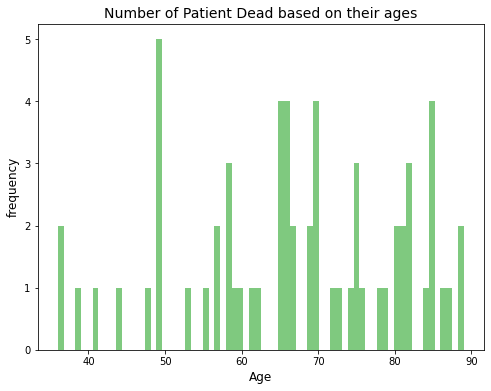

In [18]:
# we want to find No's of patient died and recovered based on their ages

plt.figure(figsize=(8,6))
df[df['death']==1]['age'].plot(kind='hist',bins=70, colormap='Accent')
plt.title('Number of Patient Dead based on their ages', fontsize=14)
plt.xlabel('Age',fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.show()

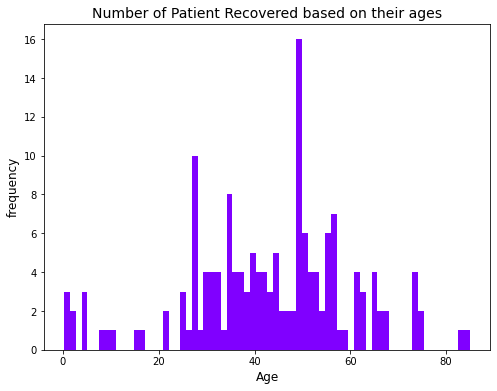

In [19]:
# Will get Age v/s Frequency

plt.figure(figsize=(8,6))
df[df['recovered']==1]['age'].plot(kind='hist',bins=70, colormap='rainbow')
plt.title('Number of Patient Recovered based on their ages', fontsize=14)
plt.xlabel('Age',fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.show()

In [20]:
# Will get print of count

print('Current count of patient: ', df['death'].count())
print('Current count of dead patient: ', df[df['death']==1]['death'].count())
print('Number of Patient REcovered: ', df[df['recovered']==1]['death'].count())
print('Number of patient recieveing treatment: ', df[(df['death']==0)&(df['recovered']==0)].count())


Current count of patient:  1084
Current count of dead patient:  63
Number of Patient REcovered:  159
Number of patient recieveing treatment:  reporting_date    862
location          862
country           862
gender            862
age               862
visiting_wuhan    862
from_wuhan        862
death             862
recovered         862
year              862
month             862
dtype: int64


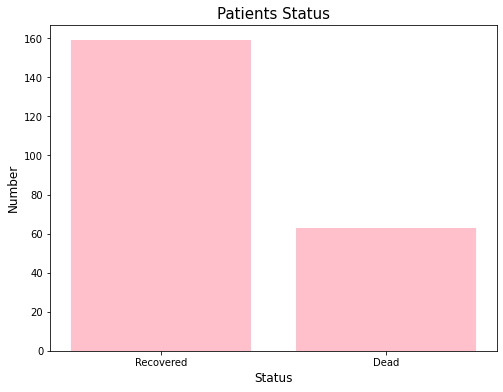

In [21]:
plt.figure(figsize=(8,6))
plt.bar(x=['Recovered','Dead'],height=[159,63], color='pink')
plt.title('Patients Status',fontsize=15)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number',fontsize=12)
plt.show()


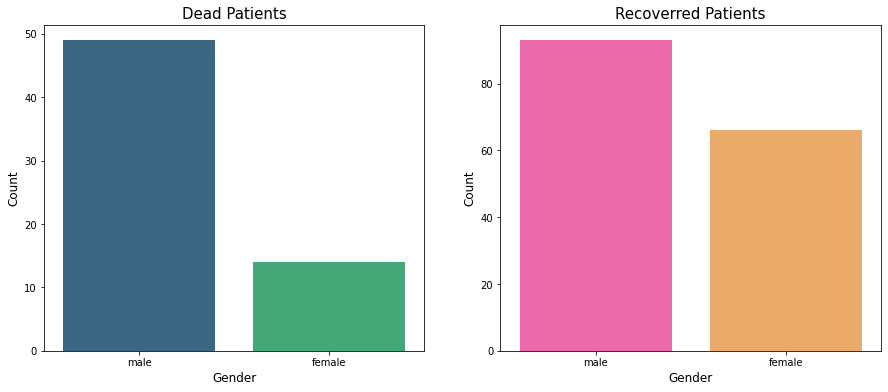

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='gender', data=df[df['death']==1], palette='viridis')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Dead Patients',fontsize=15)
plt.subplot(1,2,2)
sns.countplot(x='gender', data=df[df['recovered']==1], palette='spring')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Recoverred Patients',fontsize=15)
plt.show()

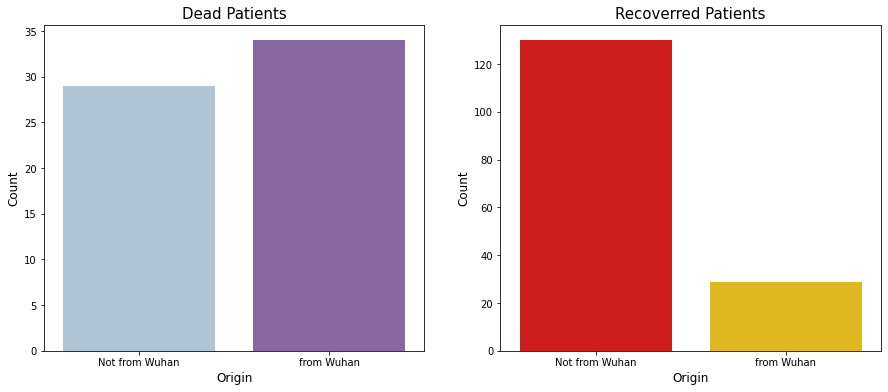

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='from_wuhan', data=df[df['death']==1], palette='BuPu')
plt.xticks([0,1], ['Not from Wuhan','from Wuhan'])
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Dead Patients',fontsize=15)
plt.subplot(1,2,2)
sns.countplot(x='from_wuhan', data=df[df['recovered']==1], palette='hot')
plt.xticks([0,1], ['Not from Wuhan','from Wuhan'])
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Recoverred Patients',fontsize=15)
plt.show()

In [24]:
country_order=list(df.groupby('country').count()['location'].sort_values(ascending=False).index)


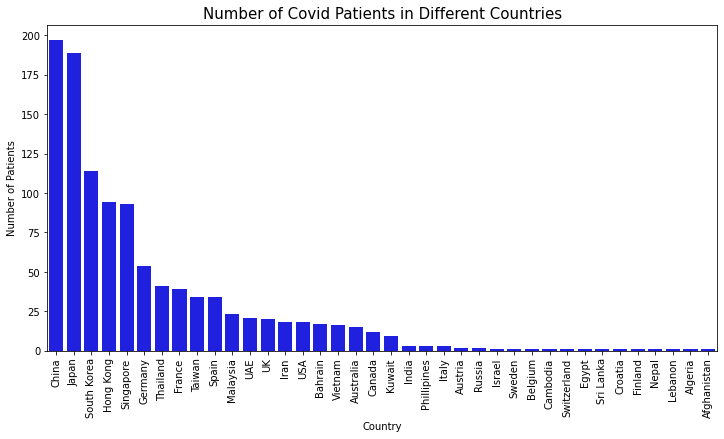

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='country',data=df,color='blue',order=country_order)
plt.xticks(rotation=90)
plt.ylabel('Number of Patients')
plt.xlabel('Country')
plt.title('Number of Covid Patients in Different Countries',fontsize=15)
plt.show()

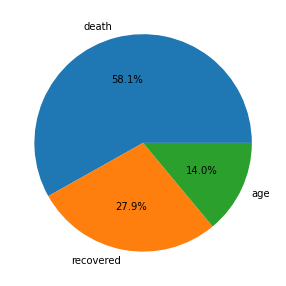

In [26]:
labels = ["death","recovered","age"]
values = [500,240,120]

f,ax = plt.subplots(figsize=(10, 5))
plt.pie(values, labels = labels,autopct='%1.1f%%')
plt.show()


In [27]:
groupby_df=df.groupby('country').sum()

**Prediction of Death or Recovery of Patients**

**Label Encoding**

In [28]:
# Location

le1=LabelEncoder()
le1.fit(df['location'])
df['location']=le1.transform(df['location'])

In [29]:
# Country

le2=LabelEncoder()
le2.fit(df['country'])
df['country']=le2.transform(df['country'])

In [30]:
# Gender

le3=LabelEncoder()
le3.fit(df['gender'])
df['gender']=le3.transform(df['gender'])

In [31]:
df.head()

,reporting_date,location,country,gender,age,visiting_wuhan,from_wuhan,death,recovered,year,month
0,2020-02-10,141,37,1,0.25,0,0,0,1,2020,2
1,2020-02-05,118,26,1,0.50,0,0,0,1,2020,2
2,2020-02-17,118,26,1,1.00,0,0,0,1,2020,2
3,2020-01-25,42,8,0,2.00,1,0,0,0,2020,1
4,2020-01-25,60,22,1,2.00,0,0,0,1,2020,1


In [39]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

**Predicting the Recovery**

In [32]:
#Spilting of the Data:

y=df['recovered']
X=df[['location','country','gender','age','visiting_wuhan','from_wuhan','month']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest Classifier**

In [34]:
rfc1=RandomForestClassifier(n_estimators=200)
rfc1.fit(X_train,y_train)
predictions_rfc1=rfc1.predict(X_test)

In [40]:
print(confusion_matrix(y_test,predictions_rfc1))
print('\n')
print(classification_report(y_test,predictions_rfc1))

[[176   9]
 [ 12  20]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       185
           1       0.69      0.62      0.66        32

    accuracy                           0.90       217
   macro avg       0.81      0.79      0.80       217
weighted avg       0.90      0.90      0.90       217



In [41]:
rf_recovery_acc = accuracy_score(y_test,predictions_rfc1)
rf_recovery_acc

0.9032258064516129

In [42]:
svc1=SVC()
svc1.fit(X_train,y_train)
predictions_svc1=svc1.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions_svc1))
print('\n')
print(classification_report(y_test,predictions_svc1))

[[185   0]
 [ 32   0]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       185
           1       0.00      0.00      0.00        32

    accuracy                           0.85       217
   macro avg       0.43      0.50      0.46       217
weighted avg       0.73      0.85      0.78       217



In [44]:
# To improve the results obtained by SVC, we define C and gamma parameters.

param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [45]:
gs1=GridSearchCV(SVC(),param_grid, verbose=3)
gs1.fit(X_train,y_train)
predictions_gs1=gs1.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.851 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [46]:
print(confusion_matrix(y_test,predictions_gs1))
print('\n')
print(classification_report(y_test,predictions_gs1))

[[182   3]
 [ 26   6]]


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       185
           1       0.67      0.19      0.29        32

    accuracy                           0.87       217
   macro avg       0.77      0.59      0.61       217
weighted avg       0.84      0.87      0.83       217



In [47]:
svr_recovery_acc = accuracy_score(y_test,predictions_gs1)
svr_recovery_acc

0.8663594470046083

**XGBoost Classifier**

In [48]:
xgbc1=xgb.XGBClassifier(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)
xgbc1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
predictions_xgbc1=xgbc1.predict(X_test)

In [50]:
print(confusion_matrix(y_test,predictions_xgbc1))
print('\n')
print(classification_report(y_test,predictions_xgbc1))

[[180   5]
 [ 11  21]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       185
           1       0.81      0.66      0.72        32

    accuracy                           0.93       217
   macro avg       0.88      0.81      0.84       217
weighted avg       0.92      0.93      0.92       217



In [51]:
xg_recovery_acc = accuracy_score(y_test,predictions_xgbc1)
xg_recovery_acc

0.9262672811059908

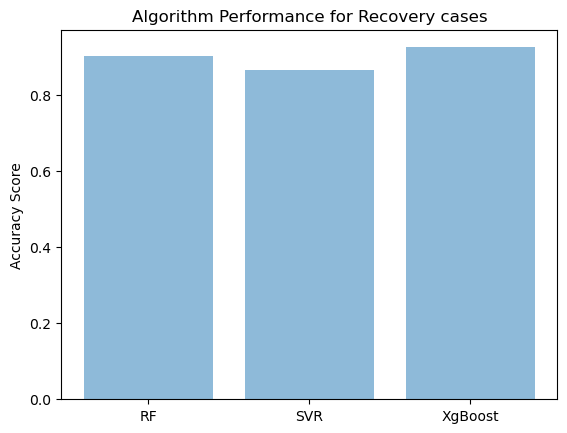

In [52]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('RF','SVR','XgBoost')
y_pos = np.arange(len(objects))
performance = [rf_recovery_acc,svr_recovery_acc,xg_recovery_acc]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Algorithm Performance for Recovery cases')

plt.show()

**Predicting Death**

In [53]:
# Spilting of data:

y=df['death']
X=df[['location','country','gender','age','visiting_wuhan','from_wuhan','month']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

**Randon Forest classifier**

In [55]:
rfc2=RandomForestClassifier(n_estimators=200)
rfc2.fit(X_train,y_train)
predictions_rfc2=rfc2.predict(X_test)

In [56]:
print(confusion_matrix(y_test,predictions_rfc2))
print('\n')
print(classification_report(y_test,predictions_rfc2))


[[202   1]
 [  9   5]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       203
           1       0.83      0.36      0.50        14

    accuracy                           0.95       217
   macro avg       0.90      0.68      0.74       217
weighted avg       0.95      0.95      0.95       217



In [57]:
rf_death_acc = accuracy_score(y_test,predictions_rfc2)
rf_death_acc

0.9539170506912442

**Support Vector Classifier**

In [58]:
svc2=SVC()
svc2.fit(X_train,y_train)
predictions_svc2=svc2.predict(X_test)


In [59]:
print(confusion_matrix(y_test,predictions_svc2))
print('\n')
print(classification_report(y_test,predictions_svc2))

[[203   0]
 [ 14   0]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       203
           1       0.00      0.00      0.00        14

    accuracy                           0.94       217
   macro avg       0.47      0.50      0.48       217
weighted avg       0.88      0.94      0.90       217



**To improve the results obtained by SVC, we define C and gamma parameters.**

In [60]:
param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [61]:
gs2=GridSearchCV(SVC(),param_grid, verbose=3)
gs2.fit(X_train,y_train)
predictions_gs2=gs2.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.948 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.942 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.942 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.948 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.942 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.942 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.943 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [62]:
print(confusion_matrix(y_test,predictions_gs2))
print('\n')
print(classification_report(y_test,predictions_gs2))

[[203   0]
 [  8   6]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       203
           1       1.00      0.43      0.60        14

    accuracy                           0.96       217
   macro avg       0.98      0.71      0.79       217
weighted avg       0.96      0.96      0.96       217



In [63]:
svr_death_acc = accuracy_score(y_test,predictions_gs2)
svr_death_acc

0.9631336405529954

**XGBoost Classifier**

In [64]:
xgbc2=xgb.XGBClassifier(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)
xgbc2.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
predictions_xgbc2=xgbc2.predict(X_test)

In [66]:
print(confusion_matrix(y_test,predictions_xgbc2))
print('\n')
print(classification_report(y_test,predictions_xgbc2))

[[203   0]
 [  9   5]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       203
           1       1.00      0.36      0.53        14

    accuracy                           0.96       217
   macro avg       0.98      0.68      0.75       217
weighted avg       0.96      0.96      0.95       217



In [67]:
xg_death_acc = accuracy_score(y_test,predictions_xgbc2)
xg_death_acc

0.9585253456221198

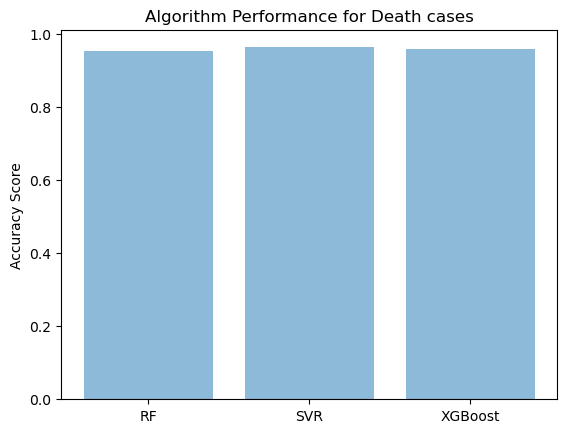

In [68]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('RF','SVR','XGBoost')
y_pos = np.arange(len(objects))
performance = [rf_death_acc,svr_death_acc,xg_death_acc]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Algorithm Performance for Death cases')

plt.show()

In [ ]:
#The main aim of this project is to  predict the COVID – 19 disease by employing various machine learning techniques.
#Various algorithms like Random Forest Classifier , SVM algorithm and XGBoost classifiers are employed in order to predict the COVID – 19 disease.
